In [1]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.primitives import BackendSampler
from qiskit.visualization import plot_histogram
from qiskit import transpile
import numpy as np
import matplotlib as mpl


# 1. The AND gate when x = 1 and y = 0.

In [2]:
def AND(x, y):
    # Creating Circuit
    q = QuantumRegister(3)
    c = ClassicalRegister(3)
    qc = QuantumCircuit(q, c)
    
    # Initialize states
    qc.initialize(x, 0)
    qc.initialize(y, 1)
    # Third qubit is 0 by default
    
    qc.ccx(0, 1, 2)
    qc.measure(q, c)
    return qc

In [3]:
def RUN(tiffoli, x, y):
    qc = tiffoli(x, y)
    print(qc)
    display(qc.draw('mpl'))
    
    backend = Aer.get_backend(name='qasm_simulator')
    job = backend.run(transpile(qc, backend))
    result = job.result()
    print(result.get_counts())
    display(plot_histogram(result.get_counts()))

      ┌─────────────────┐     ┌─┐      
q1_0: ┤ Initialize(0,1) ├──■──┤M├──────
      ├─────────────────┤  │  └╥┘┌─┐   
q1_1: ┤ Initialize(1,0) ├──■───╫─┤M├───
      └─────────────────┘┌─┴─┐ ║ └╥┘┌─┐
q1_2: ───────────────────┤ X ├─╫──╫─┤M├
                         └───┘ ║  ║ └╥┘
c0: 3/═════════════════════════╩══╩══╩═
                               0  1  2 


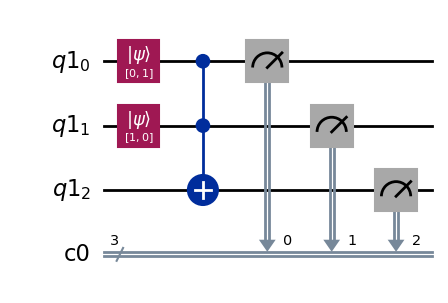

{'001': 1024}


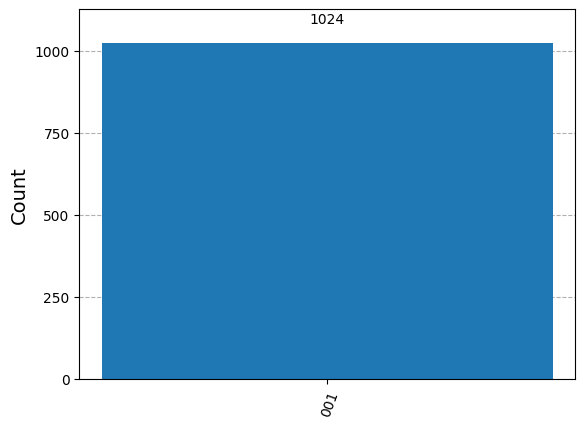

In [4]:
x = [0, 1]
y = [1, 0]
RUN(AND, x, y)

# 2. The NAND gate when x = 0 and y = 1.

In [5]:
def NAND(x, y):
    q = QuantumRegister(3)
    c = ClassicalRegister(3)
    qc = QuantumCircuit(q, c)
    
    qc.initialize(x, 0)
    qc.initialize(y, 1)
    qc.initialize([0, 1], 2)  ##1 always
    
    qc.ccx(0, 1, 2)
    qc.measure(q, c)
    return qc       

      ┌─────────────────┐     ┌─┐      
q2_0: ┤ Initialize(1,0) ├──■──┤M├──────
      ├─────────────────┤  │  └╥┘┌─┐   
q2_1: ┤ Initialize(0,1) ├──■───╫─┤M├───
      ├─────────────────┤┌─┴─┐ ║ └╥┘┌─┐
q2_2: ┤ Initialize(0,1) ├┤ X ├─╫──╫─┤M├
      └─────────────────┘└───┘ ║  ║ └╥┘
c1: 3/═════════════════════════╩══╩══╩═
                               0  1  2 


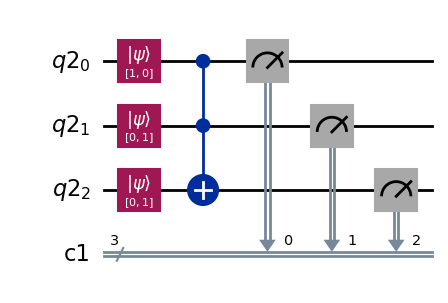

{'110': 1024}


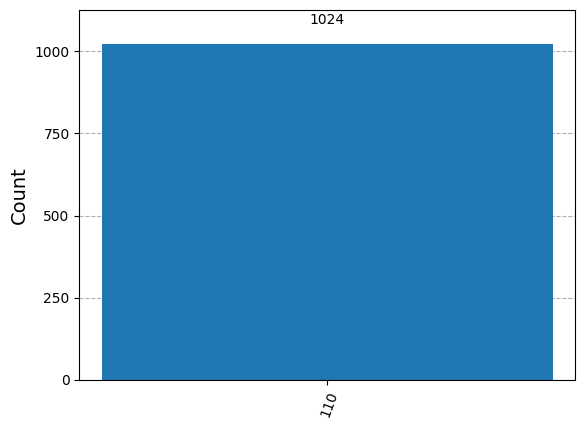

In [6]:
x = [1, 0]
y = [0, 1]
RUN(NAND, x, y)

# 3. The NAND gate when x = 1 and y = 1.


      ┌─────────────────┐     ┌─┐      
q3_0: ┤ Initialize(0,1) ├──■──┤M├──────
      ├─────────────────┤  │  └╥┘┌─┐   
q3_1: ┤ Initialize(0,1) ├──■───╫─┤M├───
      ├─────────────────┤┌─┴─┐ ║ └╥┘┌─┐
q3_2: ┤ Initialize(0,1) ├┤ X ├─╫──╫─┤M├
      └─────────────────┘└───┘ ║  ║ └╥┘
c2: 3/═════════════════════════╩══╩══╩═
                               0  1  2 


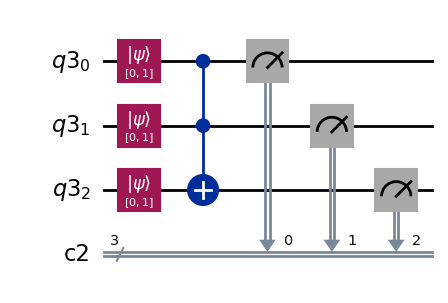

{'011': 1024}


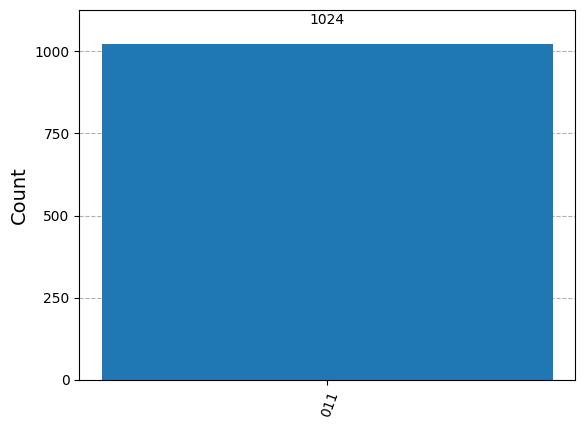

In [7]:
x = [0, 1]
y = [0, 1]
RUN(NAND, x, y)

# 4. The XOR gate when x = 0 and y = 1.

In [8]:
def XOR(x, y):
    q = QuantumRegister(3)
    c = ClassicalRegister(3)
    qc = QuantumCircuit(q, c)
    
    qc.initialize([0, 1], 0)
    qc.initialize(x, 1)
    qc.initialize(y, 2)
    
    qc.ccx(0, 1, 2)
    qc.measure(q, c)
    return qc

      ┌─────────────────┐     ┌─┐      
q4_0: ┤ Initialize(0,1) ├──■──┤M├──────
      ├─────────────────┤  │  └╥┘┌─┐   
q4_1: ┤ Initialize(1,0) ├──■───╫─┤M├───
      ├─────────────────┤┌─┴─┐ ║ └╥┘┌─┐
q4_2: ┤ Initialize(0,1) ├┤ X ├─╫──╫─┤M├
      └─────────────────┘└───┘ ║  ║ └╥┘
c3: 3/═════════════════════════╩══╩══╩═
                               0  1  2 


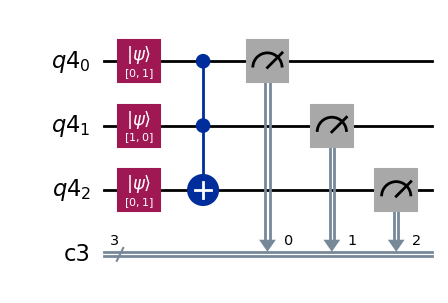

{'101': 1024}


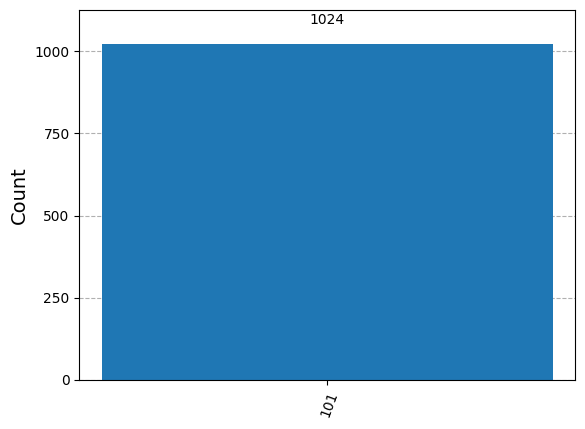

In [9]:
x = [1, 0]
y = [0, 1]
RUN(XOR, x, y)

# 5. The XOR gate when x = 1 and y = 1.

      ┌─────────────────┐     ┌─┐      
q5_0: ┤ Initialize(0,1) ├──■──┤M├──────
      ├─────────────────┤  │  └╥┘┌─┐   
q5_1: ┤ Initialize(0,1) ├──■───╫─┤M├───
      ├─────────────────┤┌─┴─┐ ║ └╥┘┌─┐
q5_2: ┤ Initialize(0,1) ├┤ X ├─╫──╫─┤M├
      └─────────────────┘└───┘ ║  ║ └╥┘
c4: 3/═════════════════════════╩══╩══╩═
                               0  1  2 


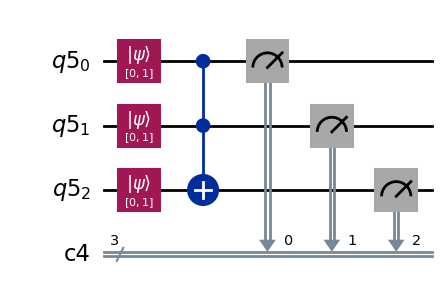

{'011': 1024}


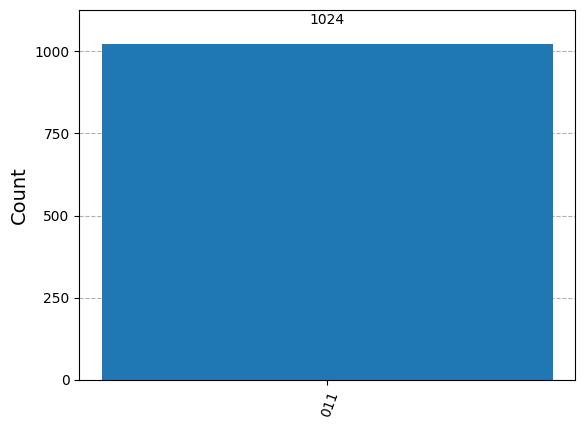

In [10]:
x = [0, 1]
y = [0, 1]
RUN(XOR, x, y)

# 6. The OR gate when x = 1 and y = 0.

In [11]:
def OR(x, y):
    q = QuantumRegister(7)
    c = ClassicalRegister(7)
    qc = QuantumCircuit(q, c)
    
    ## NAND as NOT
    qc.initialize(x, 0)
    qc.initialize(x, 1)
    qc.initialize([0, 1], 2)
    qc.ccx(0, 1, 2)
    
    ## NAND as NOT
    qc.initialize(y, 3)
    qc.initialize(y, 4)
    qc.initialize([0, 1], 5)
    qc.ccx(3, 4, 5)
    
    ## NAND for the 2 outupts
    qc.initialize([0, 1], 6)
    qc.ccx(2, 5, 6)
    
    qc.measure(q, c)
    return qc
    

      ┌─────────────────┐          ┌─┐                  
q6_0: ┤ Initialize(0,1) ├──■───────┤M├──────────────────
      ├─────────────────┤  │       └╥┘┌─┐               
q6_1: ┤ Initialize(0,1) ├──■────────╫─┤M├───────────────
      ├─────────────────┤┌─┴─┐      ║ └╥┘      ┌─┐      
q6_2: ┤ Initialize(0,1) ├┤ X ├──■───╫──╫───────┤M├──────
      ├─────────────────┤└───┘  │   ║  ║ ┌─┐   └╥┘      
q6_3: ┤ Initialize(1,0) ├──■────┼───╫──╫─┤M├────╫───────
      ├─────────────────┤  │    │   ║  ║ └╥┘┌─┐ ║       
q6_4: ┤ Initialize(1,0) ├──■────┼───╫──╫──╫─┤M├─╫───────
      ├─────────────────┤┌─┴─┐  │   ║  ║  ║ └╥┘ ║ ┌─┐   
q6_5: ┤ Initialize(0,1) ├┤ X ├──■───╫──╫──╫──╫──╫─┤M├───
      ├─────────────────┤└───┘┌─┴─┐ ║  ║  ║  ║  ║ └╥┘┌─┐
q6_6: ┤ Initialize(0,1) ├─────┤ X ├─╫──╫──╫──╫──╫──╫─┤M├
      └─────────────────┘     └───┘ ║  ║  ║  ║  ║  ║ └╥┘
c5: 7/══════════════════════════════╩══╩══╩══╩══╩══╩══╩═
                                    0  1  3  4  2  5  6 


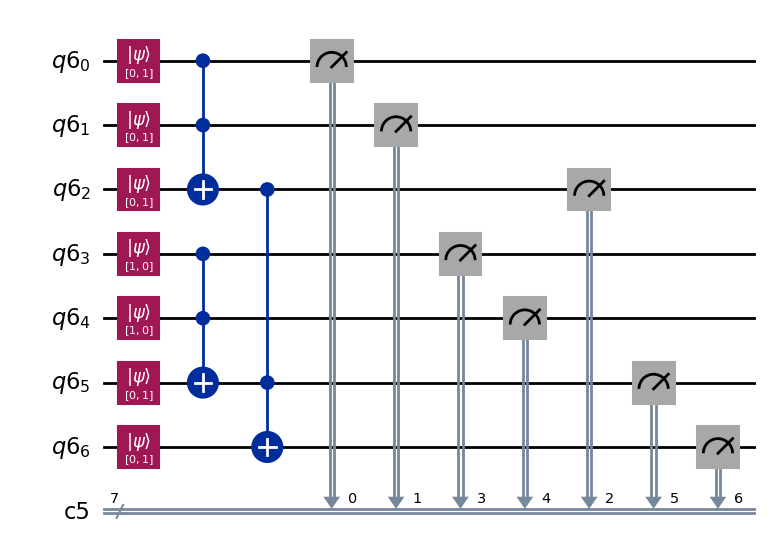

{'1100011': 1024}


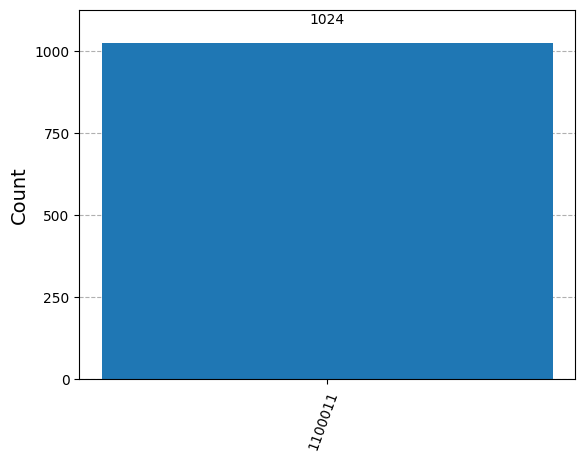

In [12]:
x = [0, 1]
y = [1, 0]
RUN(OR, x, y)

# 7. The OR gate when x = 0 and y = 0.

      ┌─────────────────┐          ┌─┐                  
q7_0: ┤ Initialize(1,0) ├──■───────┤M├──────────────────
      ├─────────────────┤  │       └╥┘┌─┐               
q7_1: ┤ Initialize(1,0) ├──■────────╫─┤M├───────────────
      ├─────────────────┤┌─┴─┐      ║ └╥┘      ┌─┐      
q7_2: ┤ Initialize(0,1) ├┤ X ├──■───╫──╫───────┤M├──────
      ├─────────────────┤└───┘  │   ║  ║ ┌─┐   └╥┘      
q7_3: ┤ Initialize(1,0) ├──■────┼───╫──╫─┤M├────╫───────
      ├─────────────────┤  │    │   ║  ║ └╥┘┌─┐ ║       
q7_4: ┤ Initialize(1,0) ├──■────┼───╫──╫──╫─┤M├─╫───────
      ├─────────────────┤┌─┴─┐  │   ║  ║  ║ └╥┘ ║ ┌─┐   
q7_5: ┤ Initialize(0,1) ├┤ X ├──■───╫──╫──╫──╫──╫─┤M├───
      ├─────────────────┤└───┘┌─┴─┐ ║  ║  ║  ║  ║ └╥┘┌─┐
q7_6: ┤ Initialize(0,1) ├─────┤ X ├─╫──╫──╫──╫──╫──╫─┤M├
      └─────────────────┘     └───┘ ║  ║  ║  ║  ║  ║ └╥┘
c6: 7/══════════════════════════════╩══╩══╩══╩══╩══╩══╩═
                                    0  1  3  4  2  5  6 


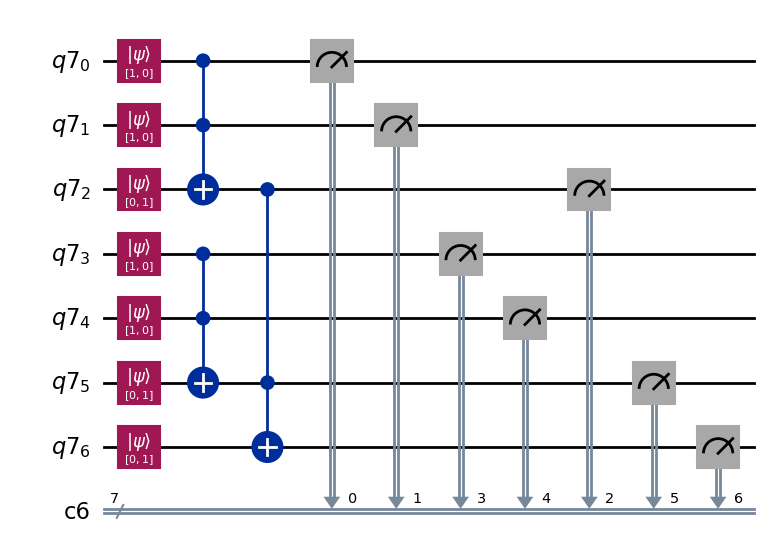

{'0100100': 1024}


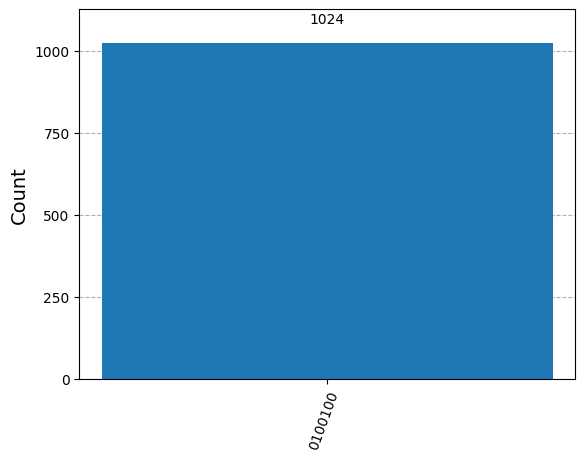

In [13]:
x = [1, 0]
y = [1, 0]
RUN(OR, x, y)

# Another Way of Creating OR, where q2 is the answer, and it uses less qubits

In [14]:
def OR2(x, y):
    q = QuantumRegister(5)
    c = ClassicalRegister(3)
    qc = QuantumCircuit(q, c)
    
    one = [0, 1]
    qc.initialize(x, 0)
    qc.initialize(y, 1)
    qc.initialize(one, 2)
    qc.initialize(one, 3)
    qc.initialize(one, 4)
    
    ## Not X 
    qc.ccx(0, 2, 3) #q3 = (x ^ 1) + 1
    
    ## Not Y
    qc.ccx(1, 2, 4) #q4 = (y ^ 1) + 1
    
    ## NAND 
    qc.ccx(3, 4, 2) #q2 = (q3 ^ q4) + 1
    
    qc.measure([0, 1, 2], c)
    return qc

x = 1, y = 0

      ┌─────────────────┐          ┌─┐           
q8_0: ┤ Initialize(0,1) ├──■───────┤M├───────────
      ├─────────────────┤  │       └╥┘     ┌─┐   
q8_1: ┤ Initialize(1,0) ├──┼────■───╫──────┤M├───
      ├─────────────────┤  │    │   ║ ┌───┐└╥┘┌─┐
q8_2: ┤ Initialize(0,1) ├──■────■───╫─┤ X ├─╫─┤M├
      ├─────────────────┤┌─┴─┐  │   ║ └─┬─┘ ║ └╥┘
q8_3: ┤ Initialize(0,1) ├┤ X ├──┼───╫───■───╫──╫─
      ├─────────────────┤└───┘┌─┴─┐ ║   │   ║  ║ 
q8_4: ┤ Initialize(0,1) ├─────┤ X ├─╫───■───╫──╫─
      └─────────────────┘     └───┘ ║       ║  ║ 
c7: 3/══════════════════════════════╩═══════╩══╩═
                                    0       1  2 


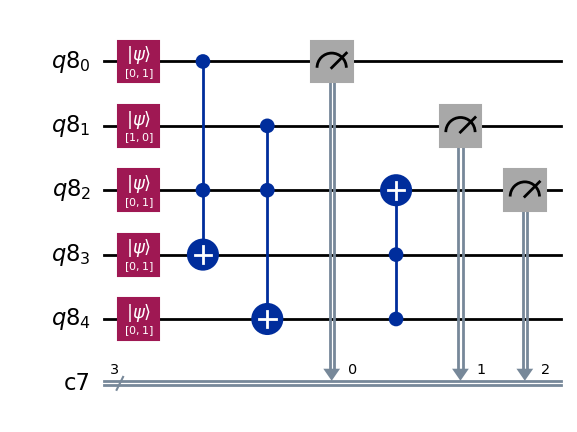

{'101': 1024}


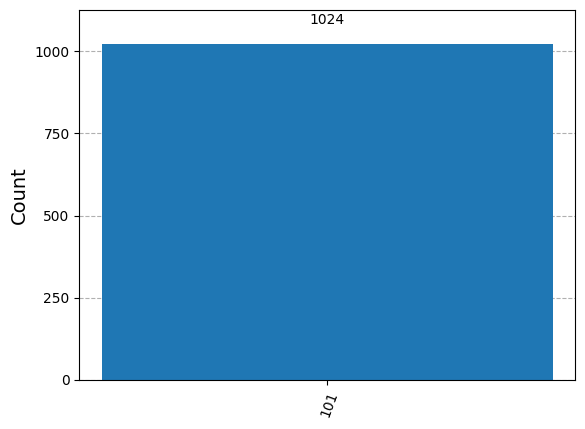

In [15]:
x = [0, 1]
y = [1, 0]
RUN(OR2, x, y)

x = 0, y = 0

      ┌─────────────────┐          ┌─┐           
q9_0: ┤ Initialize(1,0) ├──■───────┤M├───────────
      ├─────────────────┤  │       └╥┘     ┌─┐   
q9_1: ┤ Initialize(1,0) ├──┼────■───╫──────┤M├───
      ├─────────────────┤  │    │   ║ ┌───┐└╥┘┌─┐
q9_2: ┤ Initialize(0,1) ├──■────■───╫─┤ X ├─╫─┤M├
      ├─────────────────┤┌─┴─┐  │   ║ └─┬─┘ ║ └╥┘
q9_3: ┤ Initialize(0,1) ├┤ X ├──┼───╫───■───╫──╫─
      ├─────────────────┤└───┘┌─┴─┐ ║   │   ║  ║ 
q9_4: ┤ Initialize(0,1) ├─────┤ X ├─╫───■───╫──╫─
      └─────────────────┘     └───┘ ║       ║  ║ 
c8: 3/══════════════════════════════╩═══════╩══╩═
                                    0       1  2 


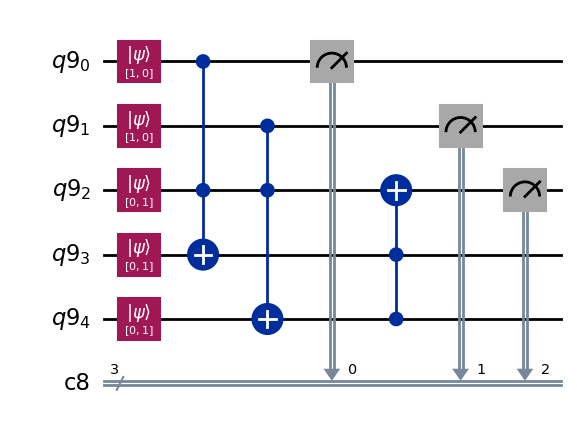

{'000': 1024}


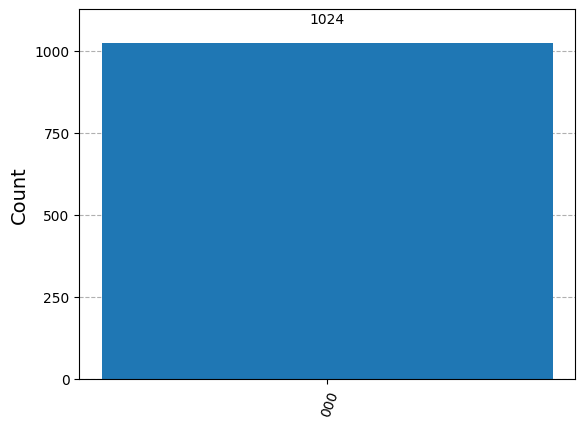

In [16]:
x = [1, 0]
y = [1, 0]
RUN(OR2, x, y)

# 8. The NOR gate when x = 1 and y = 1.

In [17]:
def NOR(x, y):
    q = QuantumRegister(7)
    c = ClassicalRegister(3)
    qc = QuantumCircuit(q, c)
    
    one = [0, 1]
    qc.initialize(x, 0)
    qc.initialize(y, 1)
    qc.initialize(one, 2)
    qc.initialize(one, 3)
    qc.initialize(one, 4)
    qc.initialize(one, 5)
    qc.initialize(one, 6)
    
    
    ## Not X 
    qc.ccx(0, 2, 3) #q3 = (x ^ 1) + 1
    
    ## Not Y
    qc.ccx(1, 2, 4) #q4 = (y ^ 1) + 1
    
    ## NAND 
    qc.ccx(3, 4, 2) #q2 = (q3 ^ q4) + 1
    
    ## NOT q2
    qc.ccx(2, 5, 6) #q6 = (q2 ^ 1) + 1
    
    qc.measure([0, 1, 6], c)
    return qc

       ┌─────────────────┐          ┌─┐                
q10_0: ┤ Initialize(0,1) ├──■───────┤M├────────────────
       ├─────────────────┤  │       └╥┘     ┌─┐        
q10_1: ┤ Initialize(0,1) ├──┼────■───╫──────┤M├────────
       ├─────────────────┤  │    │   ║ ┌───┐└╥┘        
q10_2: ┤ Initialize(0,1) ├──■────■───╫─┤ X ├─╫───■─────
       ├─────────────────┤┌─┴─┐  │   ║ └─┬─┘ ║   │     
q10_3: ┤ Initialize(0,1) ├┤ X ├──┼───╫───■───╫───┼─────
       ├─────────────────┤└───┘┌─┴─┐ ║   │   ║   │     
q10_4: ┤ Initialize(0,1) ├─────┤ X ├─╫───■───╫───┼─────
       ├─────────────────┤     └───┘ ║       ║   │     
q10_5: ┤ Initialize(0,1) ├───────────╫───────╫───■─────
       ├─────────────────┤           ║       ║ ┌─┴─┐┌─┐
q10_6: ┤ Initialize(0,1) ├───────────╫───────╫─┤ X ├┤M├
       └─────────────────┘           ║       ║ └───┘└╥┘
 c9: 3/══════════════════════════════╩═══════╩═══════╩═
                                     0       1       2 


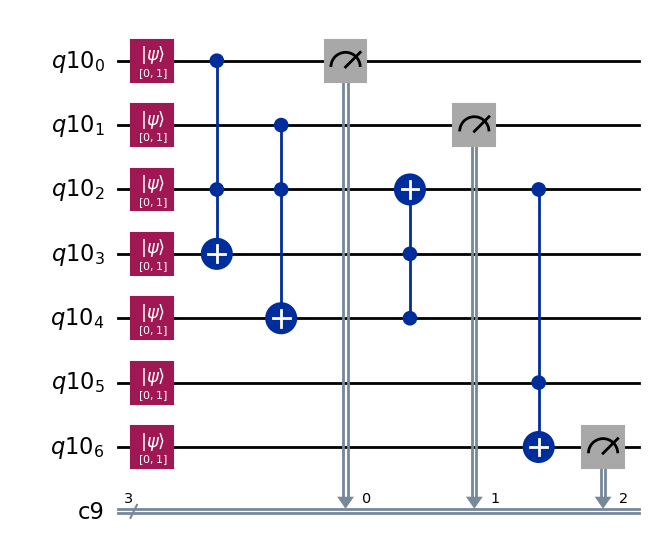

{'011': 1024}


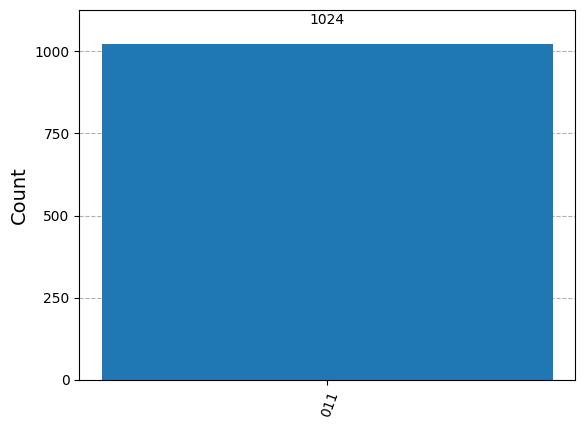

In [18]:
x = [0, 1]
y = [0, 1]
RUN(NOR, x, y)

# 9. The NOR gate when x = 0 and y = 0.

       ┌─────────────────┐          ┌─┐                
q11_0: ┤ Initialize(1,0) ├──■───────┤M├────────────────
       ├─────────────────┤  │       └╥┘     ┌─┐        
q11_1: ┤ Initialize(1,0) ├──┼────■───╫──────┤M├────────
       ├─────────────────┤  │    │   ║ ┌───┐└╥┘        
q11_2: ┤ Initialize(0,1) ├──■────■───╫─┤ X ├─╫───■─────
       ├─────────────────┤┌─┴─┐  │   ║ └─┬─┘ ║   │     
q11_3: ┤ Initialize(0,1) ├┤ X ├──┼───╫───■───╫───┼─────
       ├─────────────────┤└───┘┌─┴─┐ ║   │   ║   │     
q11_4: ┤ Initialize(0,1) ├─────┤ X ├─╫───■───╫───┼─────
       ├─────────────────┤     └───┘ ║       ║   │     
q11_5: ┤ Initialize(0,1) ├───────────╫───────╫───■─────
       ├─────────────────┤           ║       ║ ┌─┴─┐┌─┐
q11_6: ┤ Initialize(0,1) ├───────────╫───────╫─┤ X ├┤M├
       └─────────────────┘           ║       ║ └───┘└╥┘
c10: 3/══════════════════════════════╩═══════╩═══════╩═
                                     0       1       2 


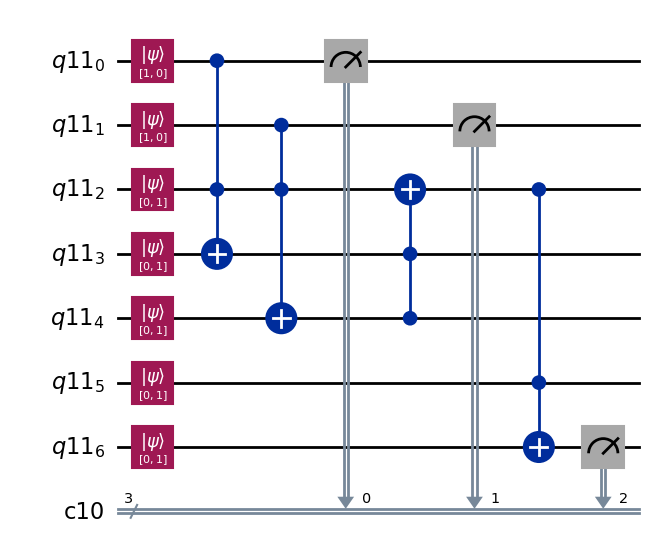

{'100': 1024}


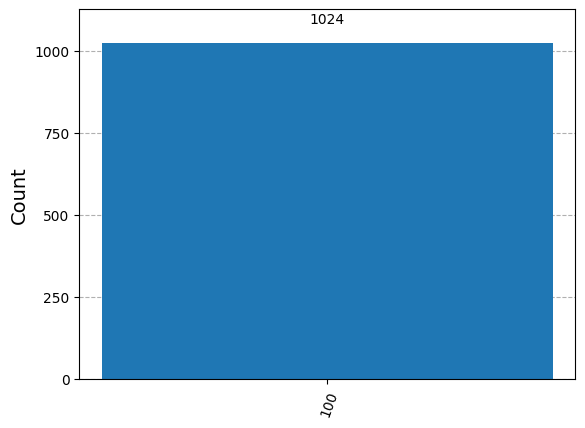

In [19]:
x = [1, 0]
y = [1, 0]
RUN(NOR, x, y)